In [2]:
import matplotlib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from  sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [14]:
pd.set_option("display.max_column" , 100)
matplotlib.rcParams["figure.figsize"] =(5,5)
plt.show()
df_original = pd.read_csv(r"C:\Users\GIHAN LAKMAL\Documents\data.csv")

C:\Users\GIHAN LAKMAL\anaconda3\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Counts')

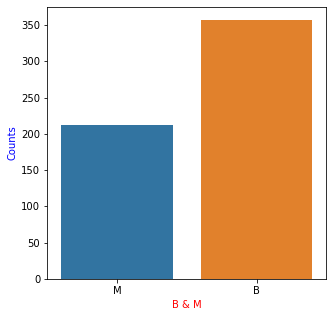

In [15]:
#print(df_original)
#print(df_original.shape)
#print(df_original.isna().sum())
df_copy_1 =df_original.dropna(axis=1)
#print(df_copy_1)
#print(df_copy_1.isna().sum())
#print(df_copy_1.diagnosis.value_counts())
sb.countplot(df_copy_1.diagnosis)
plt.xlabel("B & M" , color ="red")
plt.ylabel("Counts" , color ="blue")
#plt.show()

In [16]:
le_diagnosis =LabelEncoder()
df_copy_1["le_diagnosis"] = le_diagnosis.fit_transform(df_copy_1.diagnosis)
#print(df_copy_1)
df_Y = df_copy_1.le_diagnosis
#print(df_Y)
#print(df_copy_1.dtypes)
#sb.pairplot(df_copy_1.iloc[: , 1:5] , hue ="diagnosis")
#plt.show()

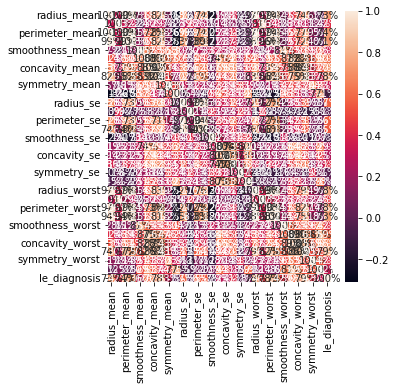

In [17]:
df_copy_1 =df_copy_1.drop("diagnosis" , axis="columns")
#print(df_copy_1.columns)
#print(df_copy_1.iloc[: , 1:32].corr())
sb.heatmap(df_copy_1.iloc[: ,  1:32].corr() , annot =True, fmt=".0%")
#plt.show()
df_X =df_copy_1.drop(["le_diagnosis", "id" , "symmetry_se" , "smoothness_se" , "texture_se" ,"fractal_dimension_mean" ] , axis ="columns")
#print(df_X.columns)
X_train , X_test , Y_train , Y_test =train_test_split(df_X, df_Y , test_size=0.2)

In [18]:
models_params={ "svm":{"model": SVC(gamma="auto") ,
                       "params":{"C":[1,10,20] ,"kernel": ["rbf", "linear"] }} ,
                "logistic_regression": {"model": LogisticRegression(solver="liblinear" ,multi_class="auto") ,
                                       "params": {"C":[1,5,10] }} ,
                "randome_forest": {"model":RandomForestClassifier() ,
                                   "params":{"n_estimators" :[1,5,10]  }}     }
Score =[]
for models_names ,mp in models_params.items():
    clf =GridSearchCV(mp["model"] ,mp["params"] ,cv=5, return_train_score=False)
    clf.fit(df_X , df_Y)
    Score.append({
        "model":models_names,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })

                 model  best_score                    best_params
0                  svm    0.959603  {'C': 20, 'kernel': 'linear'}
1  logistic_regression    0.957833                       {'C': 5}
2       randome_forest    0.959618           {'n_estimators': 10}
0.9494505494505494


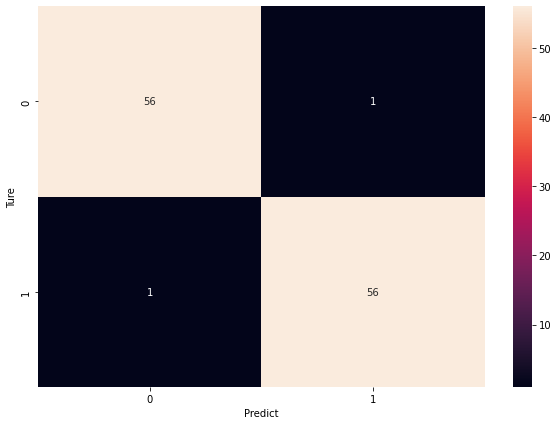

In [19]:
model_selection= pd.DataFrame(Score , columns=["model" , "best_score" ,"best_params"])
print(model_selection)
model = SVC(C= 20, kernel= "linear")
model.fit(X_test, Y_test)
print(model.score(X_train , Y_train))
y_predict =model.predict(X_test)
cm =confusion_matrix(Y_test ,y_predict)
#print(cm)
plt.figure(figsize =(10,7))
sb.heatmap(cm, annot =True)
plt.xlabel("Predict")
plt.ylabel("Ture")
plt.show()